---
# Exercise 4
#### Xiong Ying (U1920015B)

---
# Set up

In [99]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [100]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---
# Problem 1: Predicting SalePrice using GrLivArea

### a) Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship.

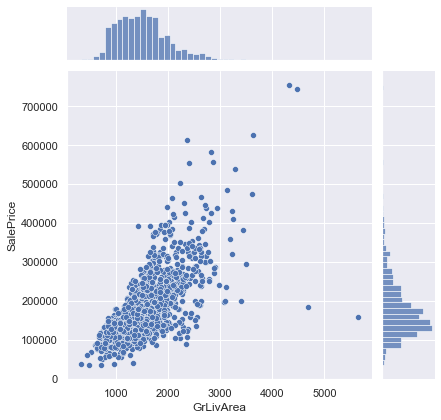

In [101]:
GrLivArea = pd.DataFrame(houseData['GrLivArea'])  # Predictor
SalePrice = pd.DataFrame(houseData['SalePrice'])  # Response

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([GrLivArea,SalePrice], axis = 1).reindex(GrLivArea.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = jointDF, x = "GrLivArea", y = "SalePrice", height = 6)

---
### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

<AxesSubplot:>

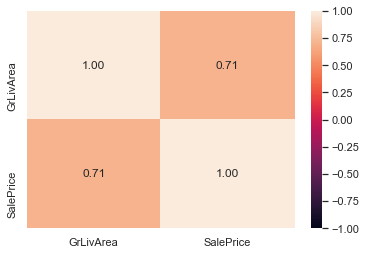

In [102]:
# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

---
### c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [103]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---
### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [104]:
# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(GrLivArea, SalePrice, test_size = 360)

---
### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea.

In [105]:
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, Y_train)        # train the linear regression model

LinearRegression()

---
### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

Intercept of Regression 	: b =  [23925.6623934]
Coefficients of Regression 	: a =  [[103.30774885]]



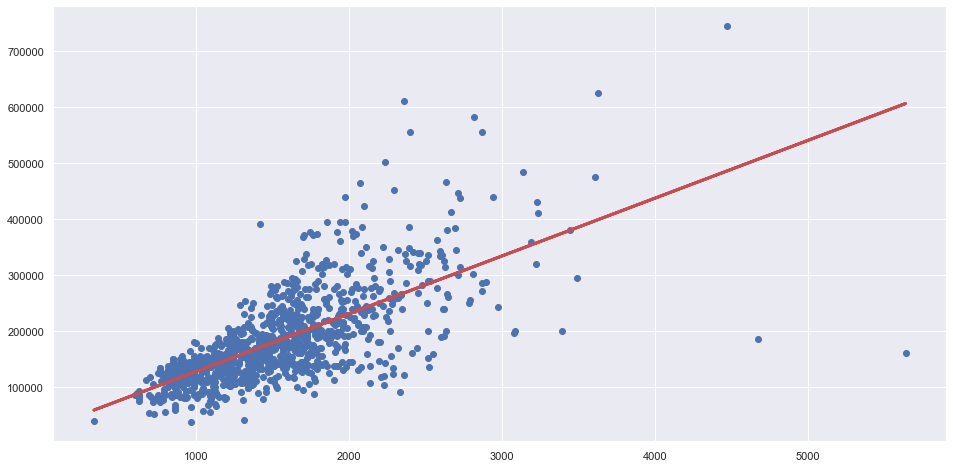

In [106]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_X = X_train
regline_Y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, Y_train)
plt.plot(regline_X, regline_Y, 'r-', linewidth = 3)
plt.show()

---
### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

In [107]:
Y_train_pred = linreg.predict(X_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47882667467015694
Mean Squared Error (MSE) 	: 3335432307.139781



---
### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.

In [108]:
# Predict Test Set
Y_test_pred = linreg.predict(X_test)

---
### i) Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy

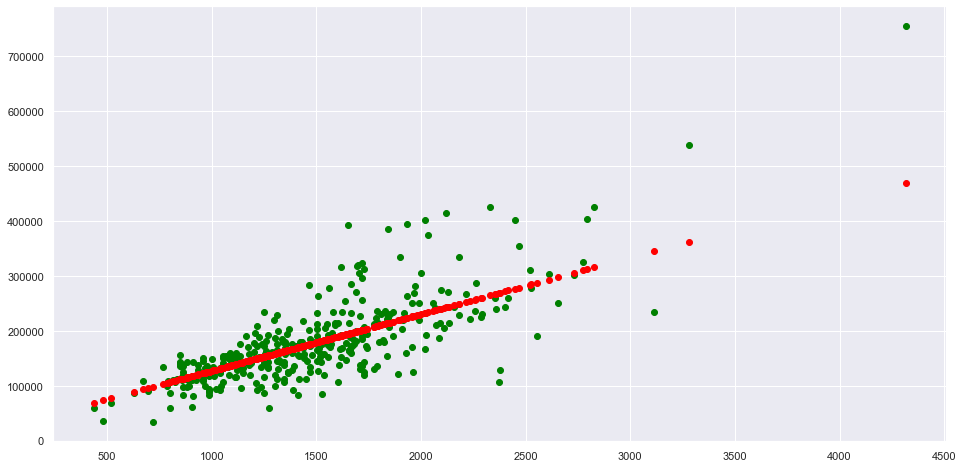

In [109]:
# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, Y_test, color = "green")
plt.scatter(X_test, Y_test_pred, color = "red")
plt.show()

---
### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [110]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5741190245790582
Mean Squared Error (MSE) 	: 2559334744.603973



---
# Problem 2 : Predicting SalePrice using Other Variables


“LotArea”, “TotalBsmtSF”, “GarageArea”

---
### 2.1 “LotArea”

### a) Plot SalePrice against LotArea using any appropriate bivariate plot to note the strong linear relationship.

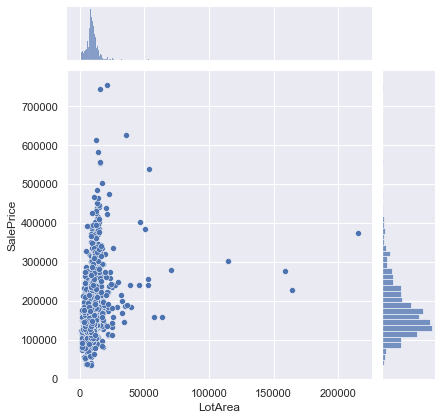

In [111]:
LotArea = pd.DataFrame(houseData['LotArea'])  # Predictor
SalePrice = pd.DataFrame(houseData['SalePrice'])  # Response

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([LotArea,SalePrice], axis = 1).reindex(LotArea.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 6)

---
### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

<AxesSubplot:>

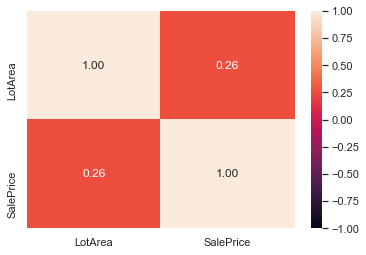

In [112]:
# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

---
### c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [113]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---
### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [114]:
# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(LotArea, SalePrice, test_size = 360)

---
### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using LotArea.

In [115]:
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, Y_train)        # train the linear regression model

LinearRegression()

---
### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

Intercept of Regression 	: b =  [159888.01177105]
Coefficients of Regression 	: a =  [[2.06663818]]



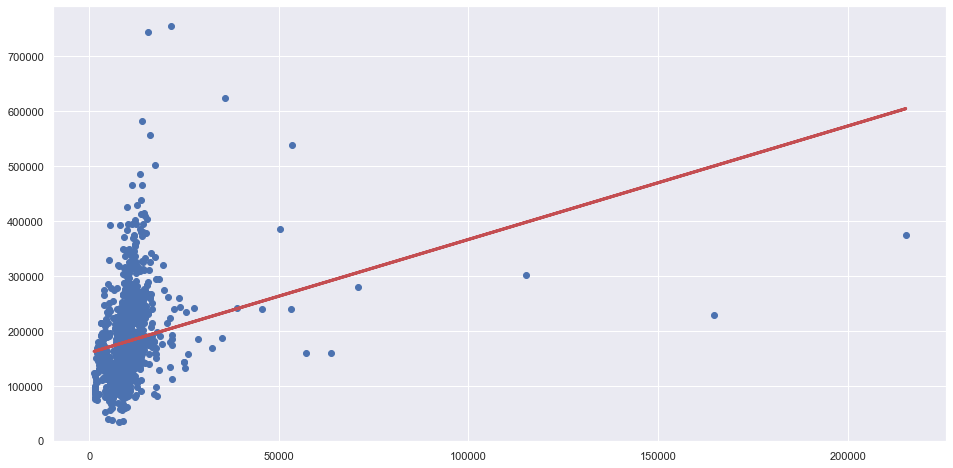

In [116]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_X = X_train
regline_Y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, Y_train)
plt.plot(regline_X, regline_Y, 'r-', linewidth = 3)
plt.show()

---
### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

In [117]:
Y_train_pred = linreg.predict(X_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0678560555565777
Mean Squared Error (MSE) 	: 5899173372.727574



---
### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable LotArea.

In [118]:
# Predict Test Set
Y_test_pred = linreg.predict(X_test)

---
### i) Plot the predictions on a Scatterplot of LotArea and SalePrice in the Test Data to visualize model accuracy

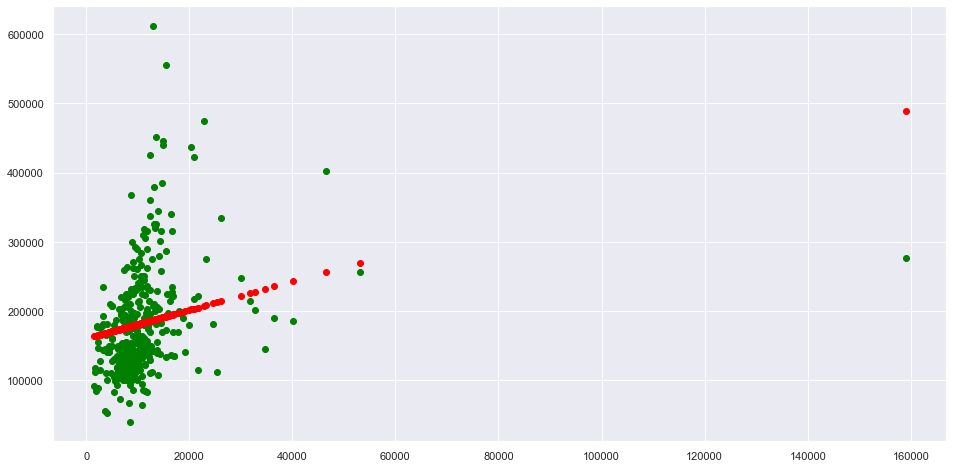

In [119]:
# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, Y_test, color = "green")
plt.scatter(X_test, Y_test_pred, color = "red")
plt.show()

---
### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [120]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0742987598363768
Mean Squared Error (MSE) 	: 5774185959.538713



---
# Problem 2 : Predicting SalePrice using Other Variables


“LotArea”, “TotalBsmtSF”, “GarageArea”

---
### 2.2 “TotalBsmtSF”

### a) Plot SalePrice against TotalBsmtSF using any appropriate bivariate plot to note the strong linear relationship.

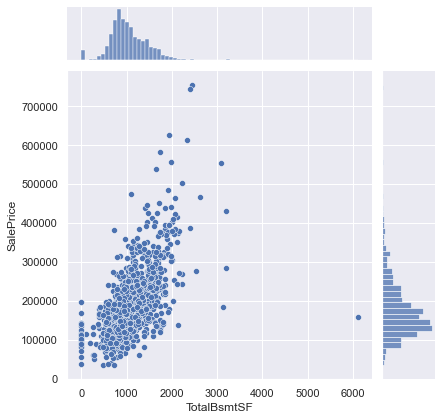

In [121]:
TotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])  # Predictor
SalePrice = pd.DataFrame(houseData['SalePrice'])  # Response

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([TotalBsmtSF,SalePrice], axis = 1).reindex(TotalBsmtSF.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = jointDF, x = "TotalBsmtSF", y = "SalePrice", height = 6)

---
### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

<AxesSubplot:>

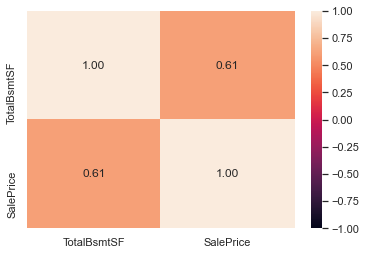

In [122]:
# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

---
### c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [123]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---
### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [124]:
# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(TotalBsmtSF, SalePrice, test_size = 360)

---
### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using TotalBsmtSF.

In [125]:
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, Y_train)        # train the linear regression model

LinearRegression()

---
### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

Intercept of Regression 	: b =  [67970.64144388]
Coefficients of Regression 	: a =  [[106.77281792]]



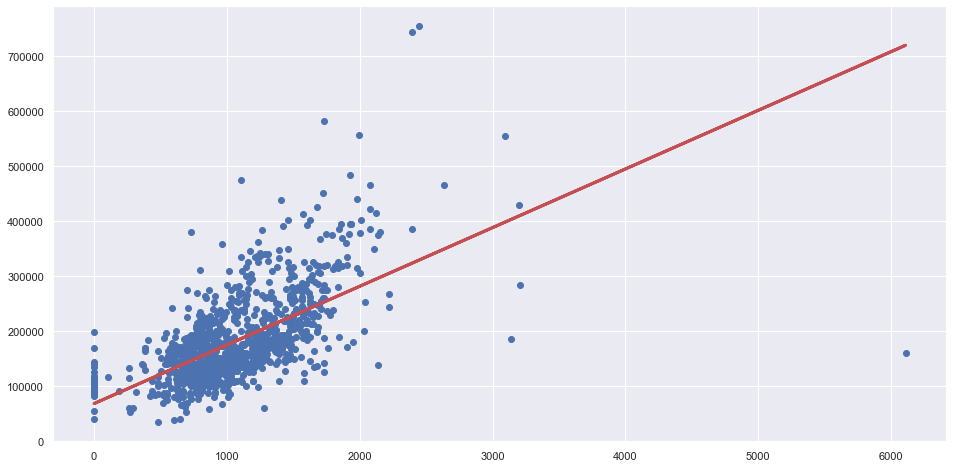

In [126]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_X = X_train
regline_Y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, Y_train)
plt.plot(regline_X, regline_Y, 'r-', linewidth = 3)
plt.show()

---
### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

In [127]:
Y_train_pred = linreg.predict(X_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37306890375911583
Mean Squared Error (MSE) 	: 3871659632.7560544



---
### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable TotalBsmtSF.

In [128]:
# Predict Test Set
Y_test_pred = linreg.predict(X_test)

---
### i) Plot the predictions on a Scatterplot of TotalBsmtSF and SalePrice in the Test Data to visualize model accuracy

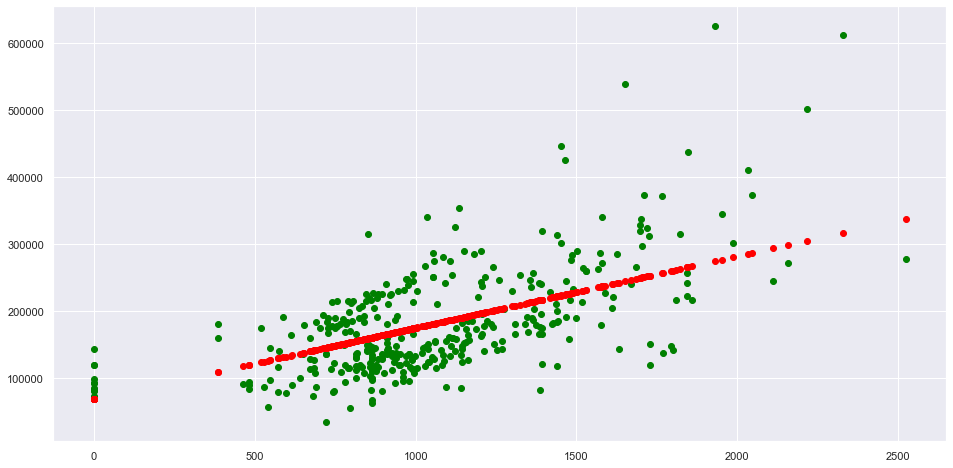

In [129]:
# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, Y_test, color = "green")
plt.scatter(X_test, Y_test_pred, color = "red")
plt.show()

---
### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [130]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3837410338194184
Mean Squared Error (MSE) 	: 4132682037.3204374



---
# Problem 2 : Predicting SalePrice using Other Variables


“LotArea”, “TotalBsmtSF”, “GarageArea”

---
### 2.3 “GarageArea”

### a) Plot SalePrice against GarageArea using any appropriate bivariate plot to note the strong linear relationship.

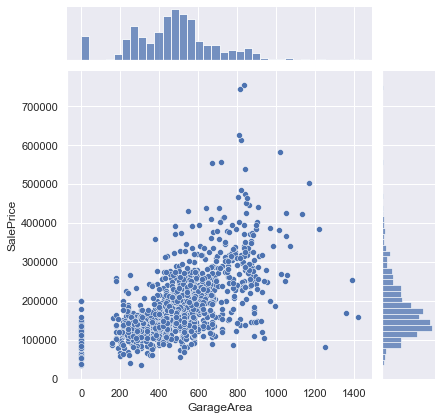

In [131]:
GarageArea = pd.DataFrame(houseData['GarageArea'])  # Predictor
SalePrice = pd.DataFrame(houseData['SalePrice'])  # Response

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([GarageArea,SalePrice], axis = 1).reindex(GarageArea.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = jointDF, x = "GarageArea", y = "SalePrice", height = 6)

---
### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

<AxesSubplot:>

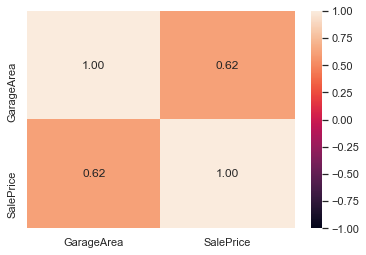

In [132]:
# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

---
### c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [133]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---
### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [134]:
# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(GarageArea, SalePrice, test_size = 360)

---
### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GarageArea.

In [135]:
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, Y_train)        # train the linear regression model

LinearRegression()

---
### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

Intercept of Regression 	: b =  [72839.1767124]
Coefficients of Regression 	: a =  [[226.96381595]]



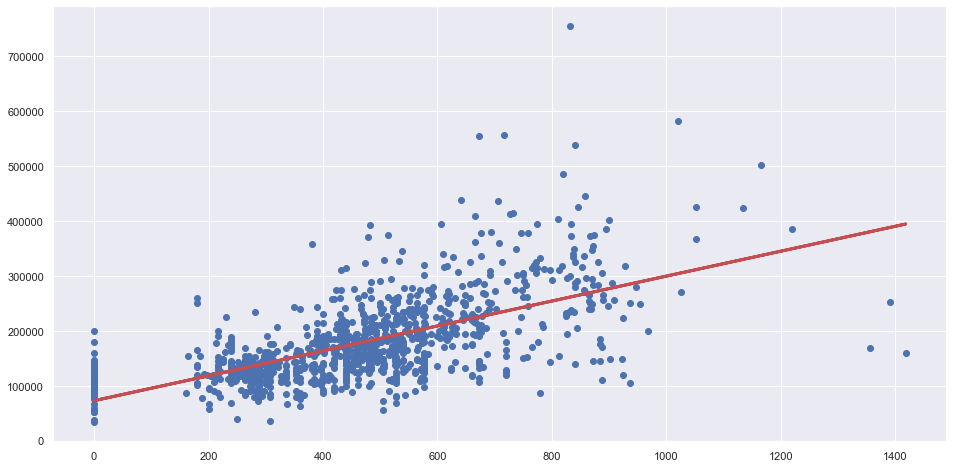

In [136]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_X = X_train
regline_Y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, Y_train)
plt.plot(regline_X, regline_Y, 'r-', linewidth = 3)
plt.show()

---
### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

In [137]:
Y_train_pred = linreg.predict(X_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3939959887905642
Mean Squared Error (MSE) 	: 3557236064.391157



---
### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GarageArea.

In [138]:
# Predict Test Set
Y_test_pred = linreg.predict(X_test)

---
### i) Plot the predictions on a Scatterplot of GarageArea and SalePrice in the Test Data to visualize model accuracy

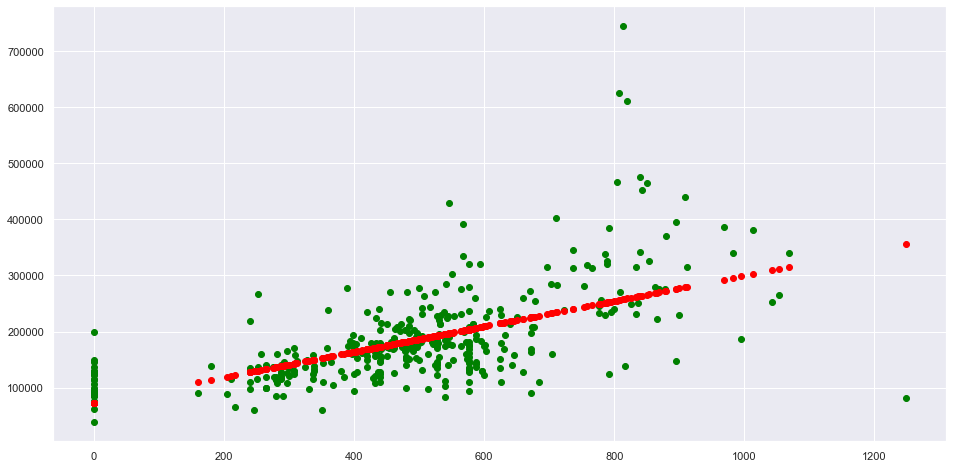

In [139]:
# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, Y_test, color = "green")
plt.scatter(X_test, Y_test_pred, color = "red")
plt.show()

---
### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [140]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.37087672789037407
Mean Squared Error (MSE) 	: 4773300495.631309



---
# Problem 3 : Best Uni-Variate Model to Predict SalePrice
Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data,
the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”.

## 1) GrLivArea

#### Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.48200978757563906 ; Mean Squared Error (MSE) 	: 3222717252.0152926

#### Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5526342961992095 ; Mean Squared Error (MSE) 	: 2932050304.740844

## 2) LotArea
#### Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07993192468811161 ; Mean Squared Error (MSE) 	: 5874317268.484721
#### Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.029175465442416115 ; Mean Squared Error (MSE) 	: 5865953526.717102

## 3) TotalBsmtSF

#### Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3650406594377341 ; Mean Squared Error (MSE) 	: 4262300954.7322354

#### Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4188687079810637 ; Mean Squared Error (MSE) 	: 2929107362.2161574

## 4) GarageArea

#### Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3939959887905642 ; Mean Squared Error (MSE) 	: 3557236064.391157



#### Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.37087672789037407 ; Mean Squared Error (MSE) 	: 4773300495.631309


## Comparison:

#### Explained Variance (R^2) on Train Data: 
"GrLivArea" > "GarageArea" > "TotalBsmtSF" > "LotArea"   

#### Mean Squared Error (MSE) on Train Data:
"LotArea" >  "TotalBsmtSF" > "GarageArea" > "GrLivArea"

#### Explained Variance (R^2) on Test Data:
"GrLivArea" > "TotalBsmtSF" > "GarageArea" > "LotArea" 

#### Mean Squared Error (MSE) on Test Data:
"LotArea" >  "GarageArea" > "GrLivArea" > "TotalBsmtSF"



## Conclusion:

The higher the R2 the better the Model.
The lower the MSE the better the Model.


#### Thus, GrLivArea is the best model to predict SalePrice.